## Shell Contact Example

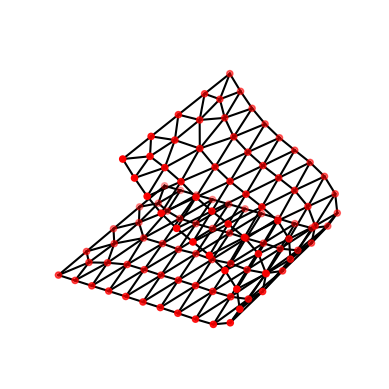

In [1]:
import numpy as np

import dismech


geom = dismech.GeomParams(rod_r0=0.005,
                          shell_h=0.001)

material = dismech.Material(density=2000,
                            youngs_rod=0,
                            youngs_shell=1e9,
                            poisson_rod=0,
                            poisson_shell=0.5)

shell_contact_sim = dismech.SimParams(static_sim=False,
                                  two_d_sim=False,   # no twisting
                                  use_mid_edge=False,
                                  use_line_search=True,
                                  show_floor=False,
                                  log_data=True,
                                  log_step=1,
                                  dt=1e-3,
                                  max_iter=120,
                                  total_time=8,
                                  plot_step=1,
                                  tol=1e-4,
                                  ftol=1e-4,
                                  dtol=1e-2)

env = dismech.Environment()
env.add_force('gravity', g=np.array([0.0, 0.0, -9.81]))
env.add_force('floorContact', ground_z=-1e-3, stiffness=50, delta=1e-1, h=1e-3)
env.add_force('selfContact', delta=1e-4, h=1e-3, kc=1)
env.add_force('damping', eta = 0.05)
#env.set_static()   

# geo = dismech.Geometry.from_txt('2random_mesh_20.txt')
# geo = dismech.Geometry.from_txt('2random_mesh_8.txt')
# geo = dismech.Geometry.from_txt('input_shell_for_self_contact.txt')
geo = dismech.Geometry.from_txt('input_shell_more_curved_rand20_scaled.txt')

robot = dismech.SoftRobot(geom, material, geo, shell_contact_sim, env)


fixed_points = np.array(np.where(
    (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 2] < 0.001) # (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 2] < 0.001)
)[0])

robot = robot.fix_nodes(fixed_points)



In [2]:
print(robot.hinge_springs.nat_strain)
# set natural hinge angles to 0 for all hinges
robot.hinge_springs.nat_strain[:] = 0.0
stepper = dismech.ImplicitEulerTimeStepper(robot)
print(robot.hinge_springs.nat_strain)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
delta: 0.1
h: 1.0
K1: 150.0
scale:  1000.0
kc:  1
upper limit for quadrati

### Time Stepping

In [3]:
robots, t_arr, f_norms = stepper.simulate()

qs = np.stack([robot.state.q for robot in robots])
t_arr = np.array(t_arr)

iter: 1, error: 1.597
iter: 2, error: 0.229
current_time:  0.001
iter: 1, error: 0.649
iter: 2, error: 0.742
current_time:  0.002
iter: 1, error: 0.907
iter: 2, error: 1.307
current_time:  0.003
iter: 1, error: 1.159
iter: 2, error: 1.783
current_time:  0.004
iter: 1, error: 1.405
iter: 2, error: 2.112
current_time:  0.005
iter: 1, error: 1.645
iter: 2, error: 2.295
current_time:  0.006
iter: 1, error: 1.879
iter: 2, error: 2.360
current_time:  0.007
iter: 1, error: 2.111
iter: 2, error: 2.350
current_time:  0.008
iter: 1, error: 2.337
iter: 2, error: 2.306
current_time:  0.009000000000000001
iter: 1, error: 2.558
iter: 2, error: 2.259
current_time:  0.010000000000000002
iter: 1, error: 2.769
iter: 2, error: 2.221
current_time:  0.011000000000000003
iter: 1, error: 2.971
iter: 2, error: 2.194
current_time:  0.012000000000000004
iter: 1, error: 3.161
iter: 2, error: 2.172
current_time:  0.013000000000000005
iter: 1, error: 3.342
iter: 2, error: 2.153
current_time:  0.014000000000000005


In [4]:
print(qs.shape[0])
print(t_arr.shape)
# t = np.arange(robot.sim_params.total_time, step=robot.sim_params.dt)
options = dismech.AnimationOptions(title='folding', plot_step=100)

fig = dismech.get_interactive_animation_plotly(robot, t_arr, qs, options)
fig.show()

8001
(8001,)


81


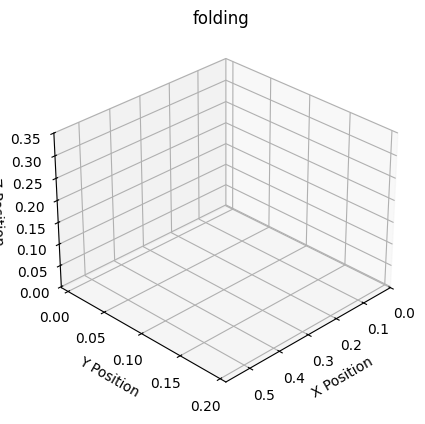

In [5]:
ani = dismech.get_animation(robot, t_arr, qs, options)
ani.save('selfcontact_final.gif')

In [6]:
from dismech.logging import logDataForRendering
t=t_arr[::1]
rod_data, shell_data = logDataForRendering(qs, t.reshape(-1, 1), robot, len(t), robot.sim_params.static_sim, robot.map_node_to_dof)

from dismech.logging import export_rod_shell_data
export_rod_shell_data(robot, rod_file='rawDataRod.txt', shell_file='rawDataShell.txt',
                          rod_js='rodData.js', shell_js='shellData.js',
                          rod_radius=0.06, scaleFactor=100)

(8001, 328) (8001, 1) (8001, 327)
(168, 3)
168


/Users/radha/GitRepos/dismech-python/src/dismech/logging.py:82: UserWarning:

loadtxt: input contained no data: "rawDataRod.txt"

